# Big Mart Sales

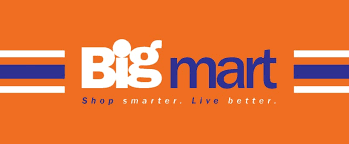

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
# Lodd the Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.rc('legend', fontsize=15) #fontsize of the legend

In [2]:
# Load the csv files (train and test)
Train_data=pd.read_csv('train_Bigmart.csv')
Test_data=pd.read_csv('test_Bigmart.csv')

In [3]:
# Checking whether the files are properly uploaded or not
# calling first 5 rows of Train_data
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Checking whether the files are properly uploaded or not
# calling first 5 rows of Test_data
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Basic Run through with data

The basic analysis will be conducted to understand the what type do data we are going analyze and play with before making rigouross cleaning

In [5]:
# Finding the datashape of each of dataframe
# Using .shape for understanding no. of Rows and Columns
print('The Training Data has',Train_data.shape,'Rows and Columns')
print('The Test Data has',Test_data.shape,'Rows and Columns')

The Training Data has (8523, 12) Rows and Columns
The Test Data has (5681, 11) Rows and Columns


In [6]:
# Describing the numeric values in the training dataset
Train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Describing the Object values in the training dataset
Train_data.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
# Describing the numeric values in the test dataset
Test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
# Describing the Object values in the training dataset
Test_data.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,FDZ50,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


###  Data Preprocessing

In [10]:
# Checking for null value in the Training dataframe
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The **Item_Weight** and **Outlet_Size** has null values 1463,2410 respectively. The null value can be removed for Item_Weight by replacing the null value with mean values of Item_Weight and Outlet_Size null value can be replaced with mode value of Outlet_Size.

In [11]:
# Identifying the unique value
Train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
# Checking the whether the variables have attributes in different styles.
# By checking a unique values
Train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
# The Array of unique value for Item_Fat_Content shows there are same value is given in different values
# Low Fat is shown as Low Fat,low fat and LF
# Regular is shown as Regular and reg
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace('low fat','Low Fat')
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace('LF','Low Fat')
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace('reg','Regular')
Train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
# Checking for unique value in Item_Type
Train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [15]:
# Checking for unique value in Outlet_Identifier
Train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [16]:
# Checking for unique value in Outlet_Size
Train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

The Null Values is available Outlet_Size. The Null value will be treated later.

In [17]:
#  Checking for unique value in Outlet_Location_Type
Train_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [18]:
#  Checking for unique value in Outlet_Type
Train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

Replace the null value in Item_Weight and Outlet_Size has null values 1463,2410 respectively.

In [19]:
# finding the Average value
Avg_Item_Weight=Train_data['Item_Weight'].mean()
print('The Average of Item Weight ',Avg_Item_Weight)

The Average of Item Weight  12.857645184136183


In [20]:
# Replacing the null values of Item_Weight with the value of Avg_Item_Weight
Train_data['Item_Weight']=Train_data['Item_Weight'].replace(np.nan,Avg_Item_Weight)
Train_data['Item_Weight'].isnull().sum()

0

In [21]:
# checking for the maximum value of Outlet_Size
# .value_counts().idxmax() returns the max value name
Max_Outlet_Size=Train_data['Outlet_Size'].value_counts().idxmax()
Max_Outlet_Size

'Medium'

In [22]:
# Replace the null value of Outlet_Size with mode value of Outlet_Size (Max_Outlet_Size)
Train_data['Outlet_Size']=Train_data['Outlet_Size'].replace(np.nan,Max_Outlet_Size)
Train_data['Outlet_Size'].isnull().sum()

0

In [23]:
# Testing whether we have taken care of all the null values of Training data
Train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Since the null values of the Training data are taken care and now we are going follow the same method for Testing data

In [24]:
# Identifying the unique value
Test_data.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [25]:
# Identifying the unique value
Test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [26]:
# The Array of unique value for Item_Fat_Content shows there are same value is given in different values
# Low Fat is shown as Low Fat,low fat and LF
# Regular is shown as Regular and reg
Test_data['Item_Fat_Content'] = Test_data['Item_Fat_Content'].replace('low fat','Low Fat')
Test_data['Item_Fat_Content'] = Test_data['Item_Fat_Content'].replace('LF','Low Fat')
Test_data['Item_Fat_Content'] = Test_data['Item_Fat_Content'].replace('reg','Regular')
Test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
# Checking for unique value in Item_Type
Test_data['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [28]:
# Checking for unique value in Outlet_Location_Type
Test_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [29]:
#  Checking for unique value in Outlet_Type
Test_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [30]:
# finding the Average value
Avg_Item_Weight=Test_data['Item_Weight'].mean()
print('The Average of Item Weight ',Avg_Item_Weight)

The Average of Item Weight  12.695633368756374


In [31]:
# Replacing the null values of Item_Weight with the value of Avg_Item_Weight
Test_data['Item_Weight']=Train_data['Item_Weight'].replace(np.nan,Avg_Item_Weight)
Test_data['Item_Weight'].isnull().sum()

0

In [32]:
# checking for the maximum value of Outlet_Size
# .value_counts().idxmax() returns the max value name
Max_Outlet_Size=Test_data['Outlet_Size'].value_counts().idxmax()
Max_Outlet_Size

'Medium'

In [33]:
# Replace the null value of Outlet_Size with mode value of Outlet_Size (Max_Outlet_Size)
Test_data['Outlet_Size']=Test_data['Outlet_Size'].replace(np.nan,Max_Outlet_Size)
Test_data['Outlet_Size'].isnull().sum()

0

### Exploratory Data Analysis  

In [34]:
# Correlation analysis
corr_matrix=Train_data.corr()
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [35]:
# Correlation of Outlet sales to understand the relationship between other numerical factors
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.011550
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

The Item_Outlet_Sales shows positive relationship with Item_Weight and Item_MRP whereas Item_Visibility and Outlet_Establishment_Year have negetive relationship with Item_Outlet_Sales.

### Graphical representation

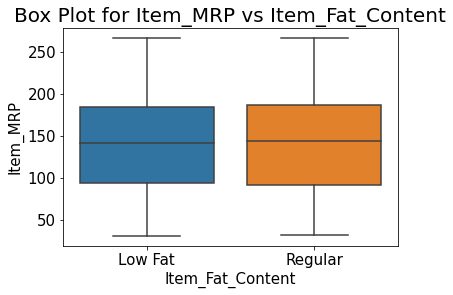

In [36]:
# To understand whether there is any relationship between Item_MRP and Item_Fat_Content variables?
ax=sns.boxplot(Train_data['Item_Fat_Content'],Train_data['Item_MRP'])
plt.title('Box Plot for Item_MRP vs Item_Fat_Content')
figure = ax.get_figure()
figure.savefig('Box Plot for Item_MRP vs Item_Fat_Content')

The plot shows that the both Low Fat and Regular has a equal Item_MRP.

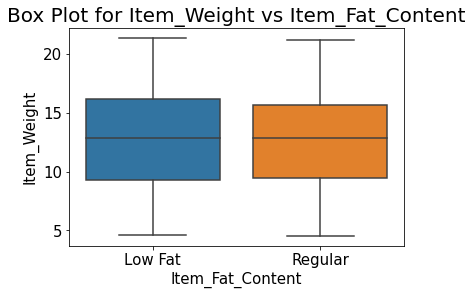

In [37]:
# To understand whether there is any relationship between Item_Weight and Item_Fat_Content variables?
ax=sns.boxplot(Train_data['Item_Fat_Content'],Train_data['Item_Weight'])
plt.title('Box Plot for Item_Weight vs Item_Fat_Content')
figure = ax.get_figure()
figure.savefig('Box Plot for Item_Weight vs Item_Fat_Content')

The plot shows that there is higher dispersion can be seen in Low Fat compared to Regular in terms of Item_Weight, This shows that the Low fat foods are sold in different quantities compared to Regular.

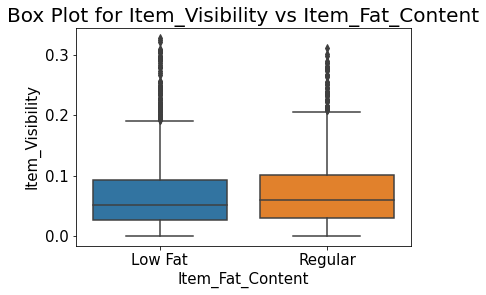

In [38]:
# To understand whether there is any relationship between Item_Visibility and Item_Fat_Content variables?
ax=sns.boxplot(Train_data['Item_Fat_Content'],Train_data['Item_Visibility'])
plt.title('Box Plot for Item_Visibility vs Item_Fat_Content')
figure = ax.get_figure()
figure.savefig('Box Plot for Item_Visibility vs Item_Fat_Content')

The plot shows that there is higher dispersion can be seen in Regular compared to Low Fat in terms of Item_Visibility, This shows that the Regular fat foods are displayed in higher Visibility compared to Low Fat Food.

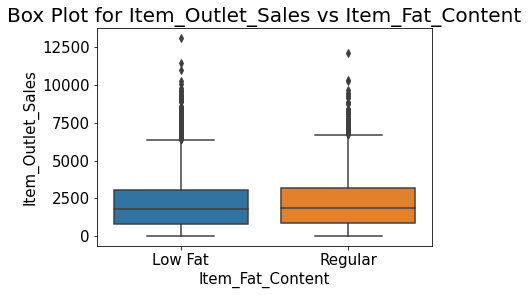

In [39]:
# To understand whether there is any relationship between Item_Outlet_Sales and Item_Fat_Content variables?
ax=sns.boxplot(Train_data['Item_Fat_Content'],Train_data['Item_Outlet_Sales'])
plt.title('Box Plot for Item_Outlet_Sales vs Item_Fat_Content')
figure = ax.get_figure()
figure.savefig('Box Plot for Item_Outlet_Sales vs Item_Fat_Content')

This plot show that Item Fat Content are equal.

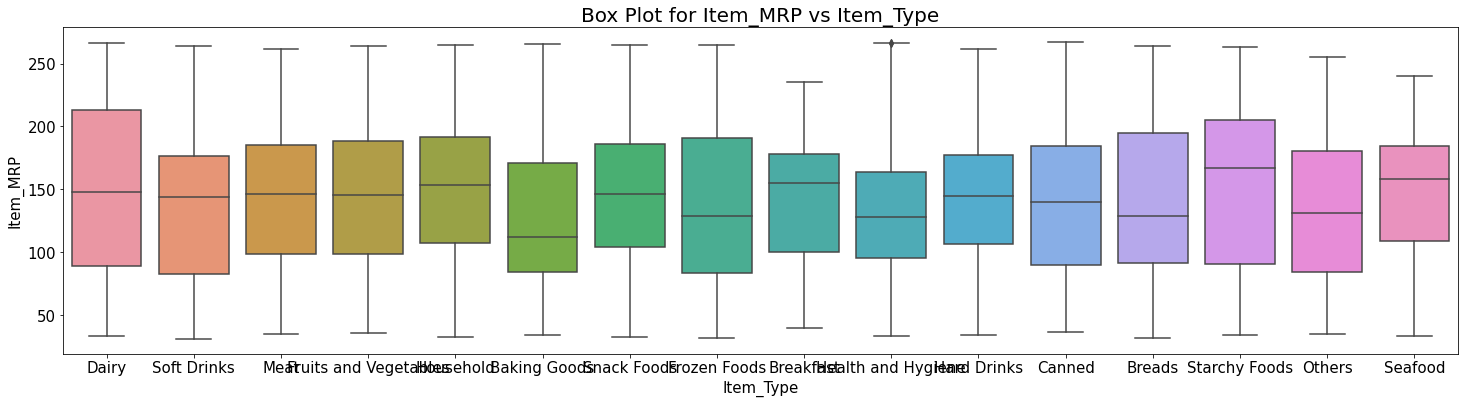

In [40]:
# To understand whether there is any relationship between Item_MRP and Item_Type variables?
plt.figure(figsize=(25, 6))
ax=sns.boxplot(Train_data['Item_Type'],Train_data['Item_MRP'])
plt.title('Box Plot for Item_MRP vs Item_Type')
figure = ax.get_figure()
figure.savefig('Box Plot for Item_MRP vs Item_Fat_Content')

Dairy Products have higher distribution compared to others types.

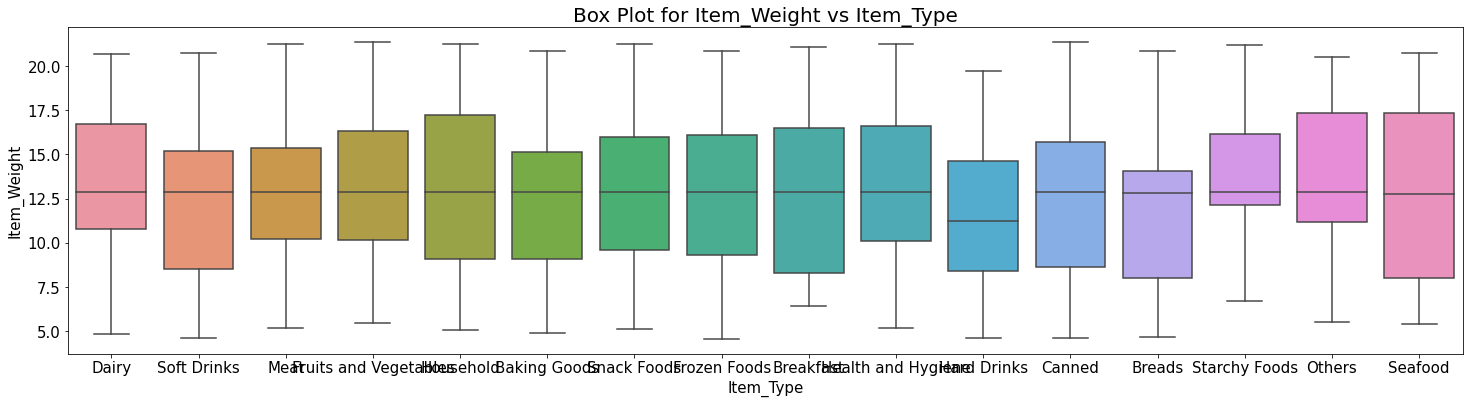

In [41]:
# To understand whether there is any relationship between Item_MRP and Item_Type variables?
plt.figure(figsize=(25, 6))
ax=sns.boxplot(Train_data['Item_Type'],Train_data['Item_Weight'])
plt.title('Box Plot for Item_Weight vs Item_Type')
figure = ax.get_figure()
figure.savefig('Box Plot for Item_Weight vs Item_Type')

Sea food Products have higher distribution compared to others types.

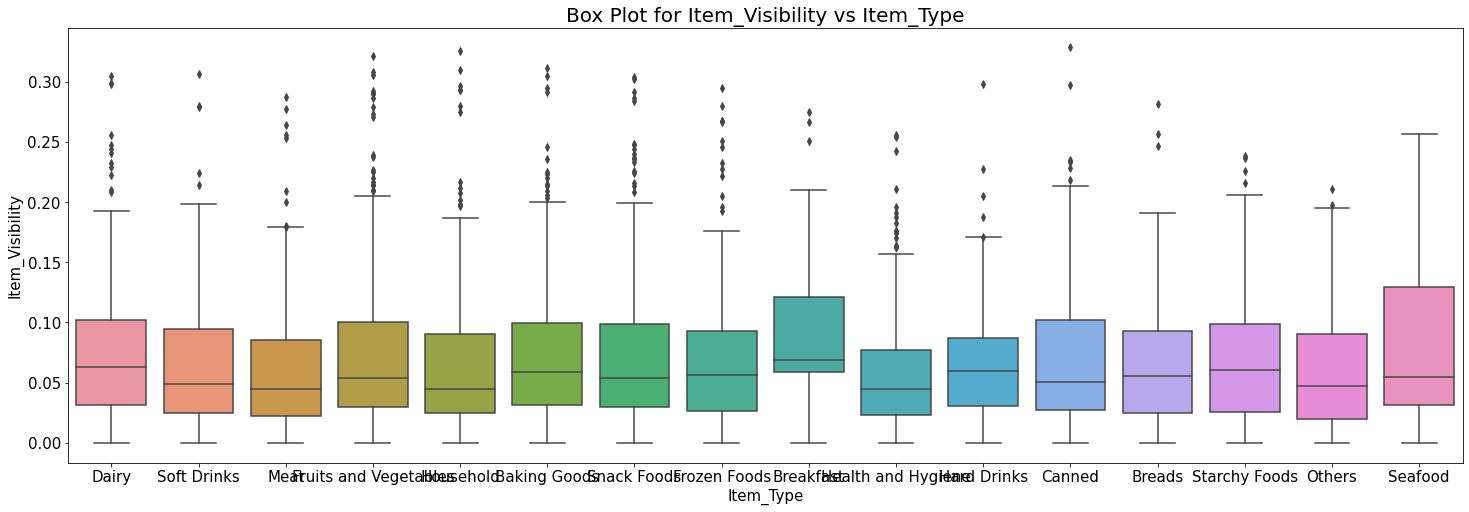

In [42]:
# To understand whether there is any relationship between Item_Visibility and Item_Type variables?
plt.figure(figsize=(25, 8))
ax=sns.boxplot(Train_data['Item_Type'],Train_data['Item_Visibility'])
plt.title('Box Plot for Item_Visibility vs Item_Type')
figure = ax.get_figure()
figure.savefig('Box Plot for Item_Visibility vs Item_Type')

Sea food Products have higher distribution compared to others types. Therefore seafood are kept in higher visbility

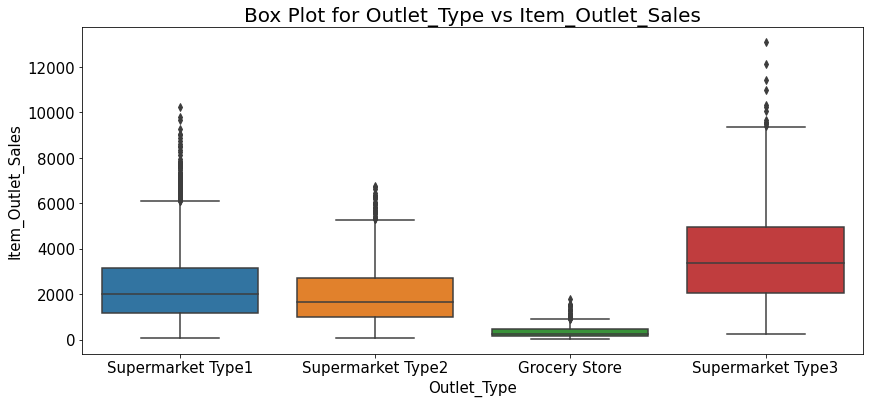

In [43]:
# Is there any effect of Outlet_Size on Item_Outlet_Sales ?
plt.figure(figsize=(14,6))
ax=sns.boxplot(Train_data['Outlet_Type'],Train_data['Item_Outlet_Sales'])
plt.title('Box Plot for Outlet_Type vs Item_Outlet_Sales')
figure = ax.get_figure()
figure.savefig('Box Plot for Outlet_Type vs Item_Outlet_Sales')

Super Market Type 3 has higher sales compared to other types

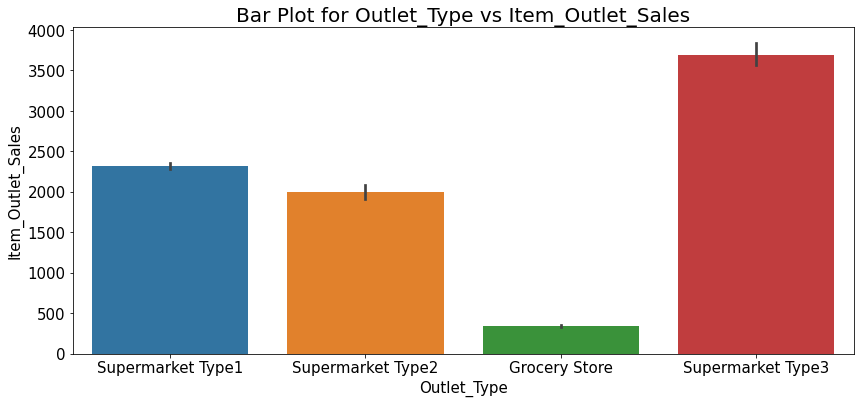

In [44]:
# Which type of outlet has maximum sales ?
plt.figure(figsize=(14, 6))
ax=sns.barplot(Train_data['Outlet_Type'],Train_data['Item_Outlet_Sales'])
plt.title('Bar Plot for Outlet_Type vs Item_Outlet_Sales')
figure = ax.get_figure()
figure.savefig('Bar Plot for Outlet_Type vs Item_Outlet_Sales')

Super Market Type 3 has a higher sales in all 4 Types.

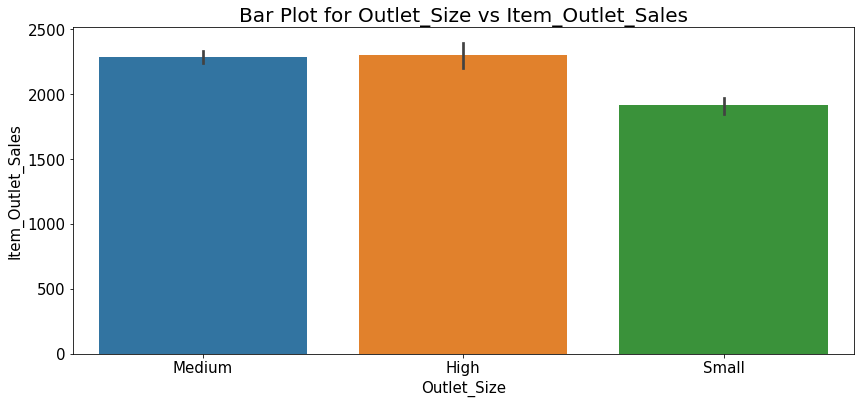

In [45]:
# Which size of outlet size has maximum sales ?
plt.figure(figsize=(14, 6))
ax=sns.barplot(Train_data['Outlet_Size'],Train_data['Item_Outlet_Sales'])
plt.title('Bar Plot for Outlet_Size vs Item_Outlet_Sales')
figure = ax.get_figure()
figure.savefig('Bar Plot for Outlet_Size vs Item_Outlet_Sales')

Medium, High Outlet size have higher sales in all 3 Outlet size.

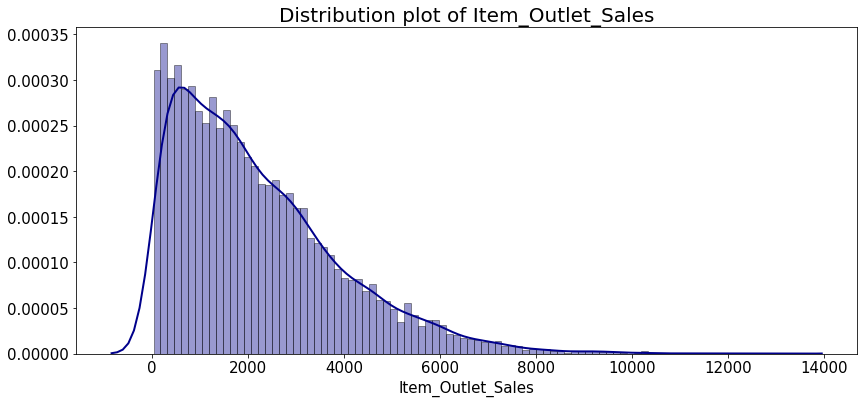

In [46]:
# Distribution plot of Item_Outlet_Sales
# hist=True shows the histogram
# kde=False Kernal density estimate shows is a non-parametric way to estimate the probability density function (PDF) of a random variable.
# kde shows the line.
plt.figure(figsize=(14, 6))
ax=sns.distplot(Train_data['Item_Outlet_Sales'],hist=True,kde=True,
            bins=int(180/2), color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':2})
plt.title('Distribution plot of Item_Outlet_Sales')
figure = ax.get_figure()
figure.savefig('Distribution plot of Item_Outlet_Sales')

This distribution shows Item_Outlet_Sales is Right skewed distribution. This means that it has a long tail in the positive direction.

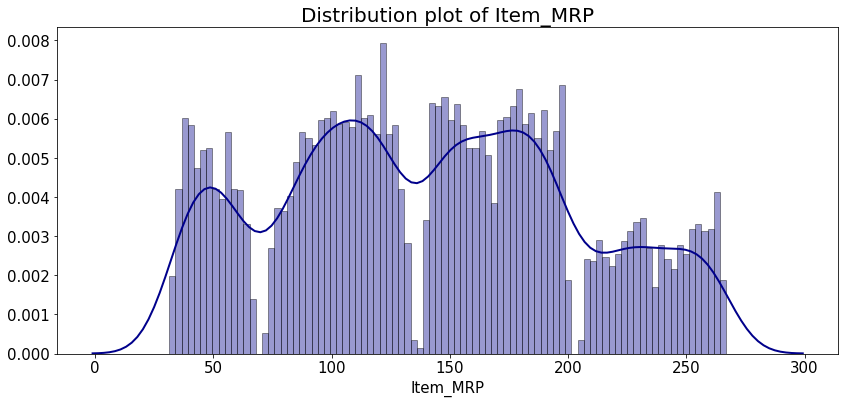

In [47]:
# Distribution plot of Item_MRP
# hist=True shows the histogram
# kde=False Kernal density estimate shows is a non-parametric way to estimate the probability density function (PDF) of a random variable.
# kde shows the line.
plt.figure(figsize=(14, 6))
ax=sns.distplot(Train_data['Item_MRP'],hist=True,kde=True,
            bins=int(180/2), color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':2})
plt.title('Distribution plot of Item_MRP')
figure = ax.get_figure()
figure.savefig('Distribution plot of Item_MRP')

This output shows 4 different pricing categories available in Item MRP

            1. Low
            2. Average
            3. High
            4. Very High

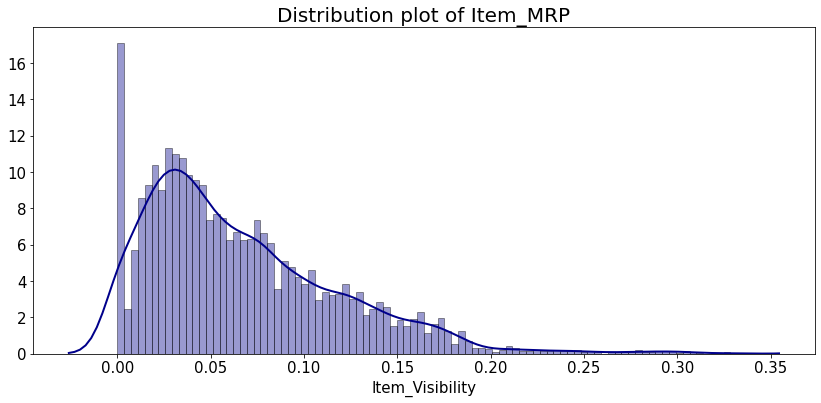

In [48]:
# Distribution plot of Item_Visibility
# hist=True shows the histogram
# kde=False Kernal density estimate shows is a non-parametric way to estimate the probability density function (PDF) of a random variable.
# kde shows the line.
plt.figure(figsize=(14, 6))
ax=sns.distplot(Train_data['Item_Visibility'],hist=True,kde=True,
            bins=int(180/2), color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':2})
plt.title('Distribution plot of Item_MRP')
figure = ax.get_figure()
figure.savefig('Distribution plot of Item_MRP')

The Item_Visibility is Right skewed

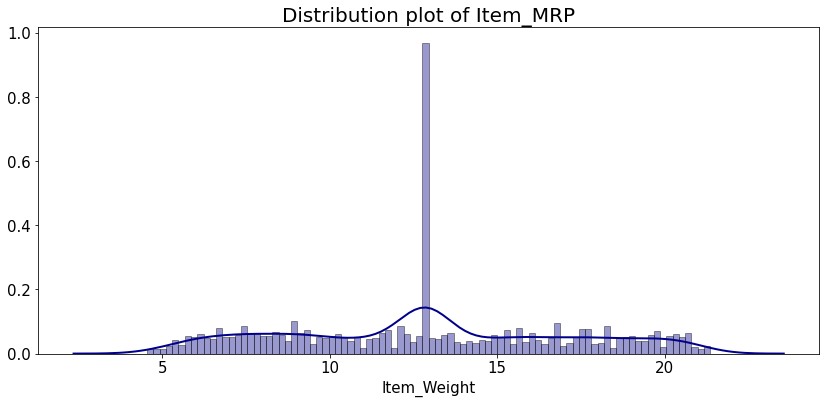

In [49]:
# Distribution plot of Item_Visibility
# hist=True shows the histogram
# kde=False Kernal density estimate shows is a non-parametric way to estimate the probability density function (PDF) of a random variable.
# kde shows the line.
plt.figure(figsize=(14, 6))
ax=sns.distplot(Train_data['Item_Weight'],hist=True,kde=True,
            bins=int(180/2), color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':2})
plt.title('Distribution plot of Item_MRP')
figure = ax.get_figure()
figure.savefig('Distribution plot of Item_MRP')

#### SINCE ITEM WEIGHT IS HIGHLY CORRELATED WITH TARGET VARIABLE WE EXPLORE IT GRAPHICALLY

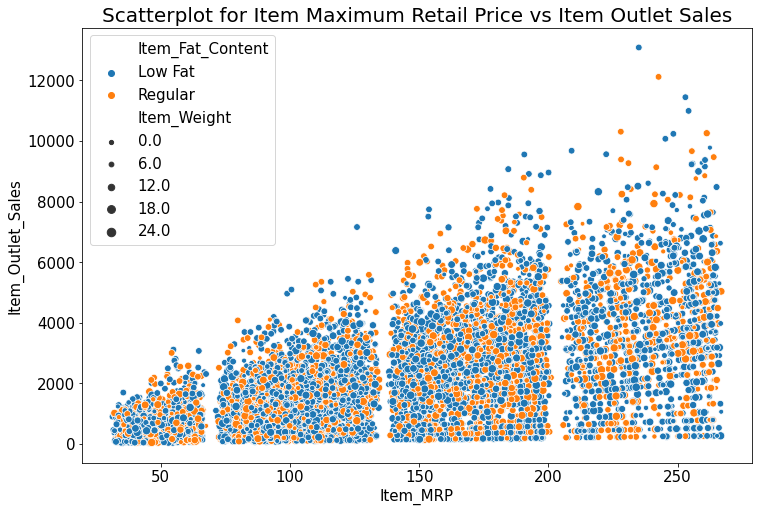

In [50]:
# scatterplot shows for Item Maximum Retail Price vs Item Outlet Sales where shade was Item Fat Content and as per the size of Item Weight. 
fig,axes=plt.subplots(1,1,figsize=(12,8))
ax=sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=Train_data)
plt.title('Scatterplot for Item Maximum Retail Price vs Item Outlet Sales')
figure = ax.get_figure()
figure.savefig('Scatterplot for Item Maximum Retail Price vs Item Outlet Sales')

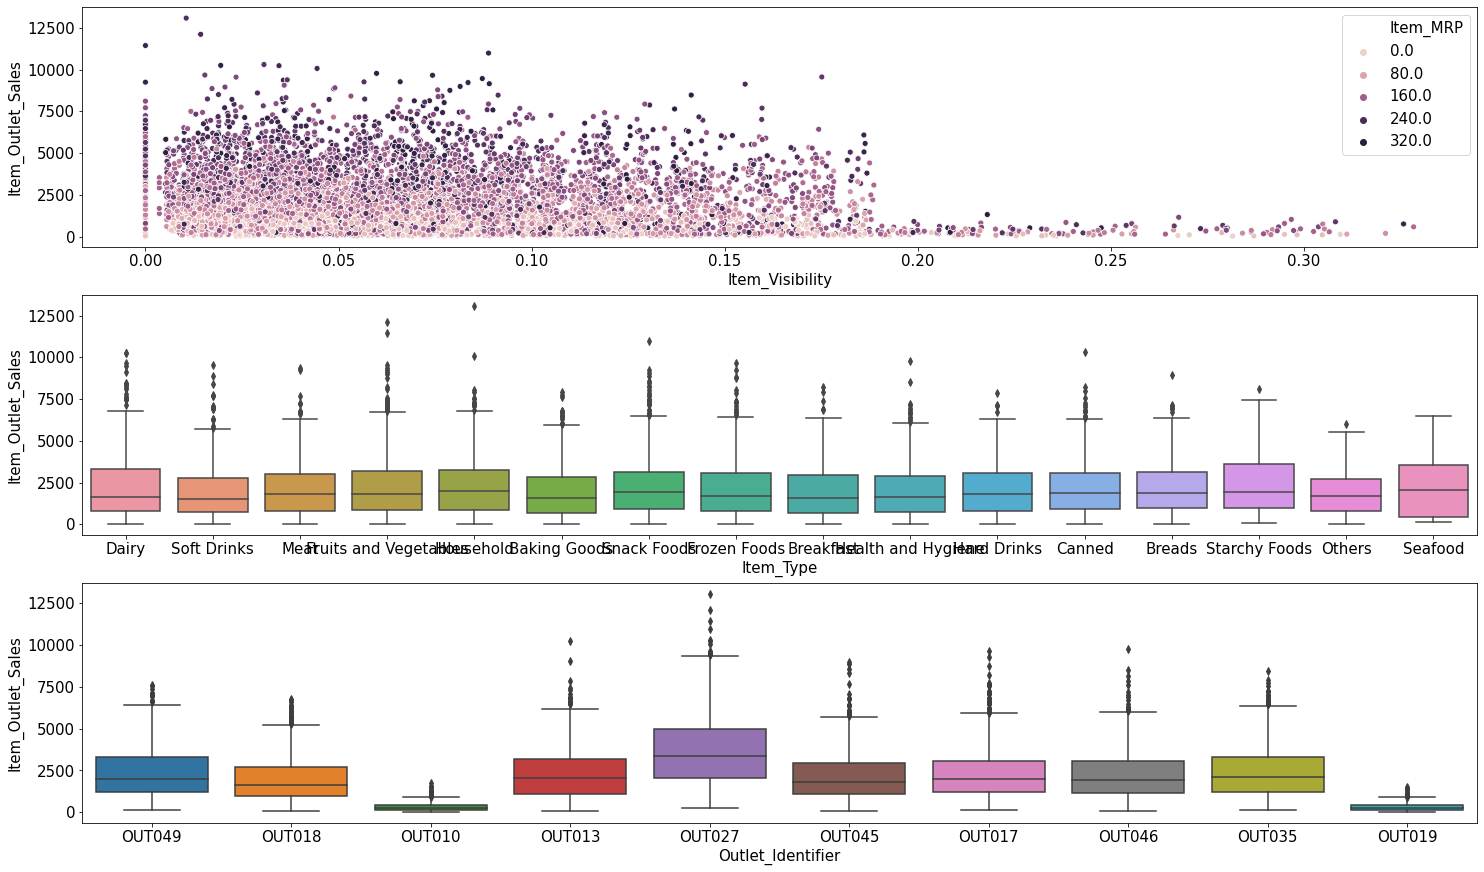

In [51]:
# NOW WE EXPLORE OTHER COLUMNS
fig,axes=plt.subplots(3,1,figsize=(25,15))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=Train_data)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=Train_data)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=Train_data)

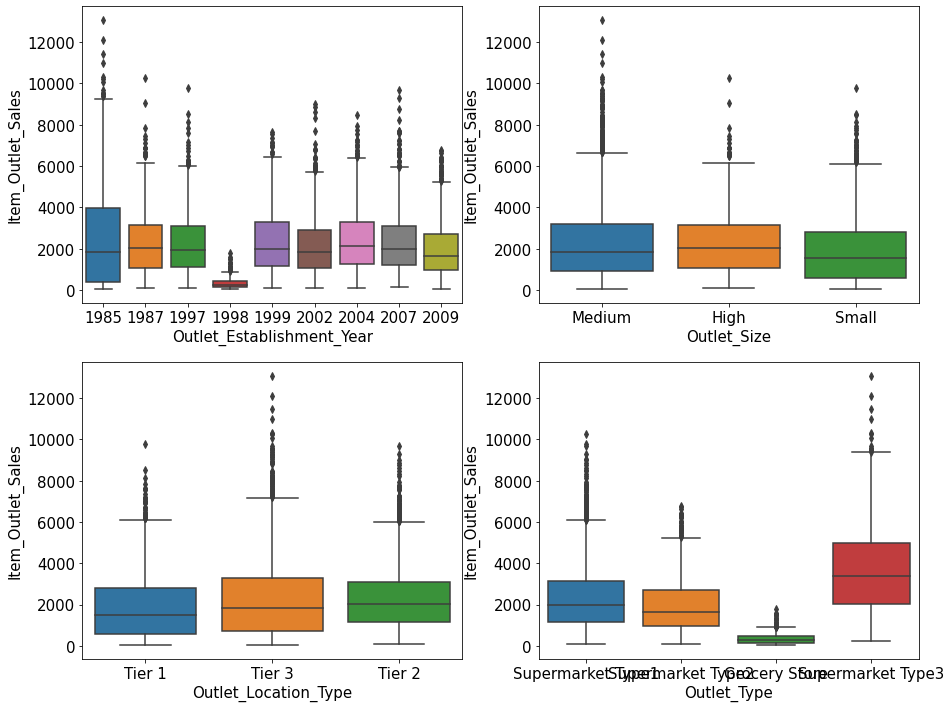

In [52]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=Train_data)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=Train_data)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=Train_data)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=Train_data)

In [53]:
#  In an outlet type, which Outlet_Size ocuurs most frequently ?
Train_data.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].count()

Outlet_Type        Outlet_Size
Grocery Store      Medium          555
                   Small           528
Supermarket Type1  High            932
                   Medium         2785
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Item_Outlet_Sales, dtype: int64

In [54]:
# In which type of outlet, there is maximum chance of getting low fat item as per outlet size?
Train_data.groupby(['Item_Fat_Content','Outlet_Size'])['Item_Outlet_Sales'].count()

Item_Fat_Content  Outlet_Size
Low Fat           High            606
                  Medium         3361
                  Small          1550
Regular           High            326
                  Medium         1842
                  Small           838
Name: Item_Outlet_Sales, dtype: int64

In [55]:
# In which type of outlet, there is maximum chance of getting regular fat item as per Outlet_Type?
Train_data.groupby(['Item_Fat_Content','Outlet_Type'])['Item_Outlet_Sales'].count()

Item_Fat_Content  Outlet_Type      
Low Fat           Grocery Store         705
                  Supermarket Type1    3609
                  Supermarket Type2     598
                  Supermarket Type3     605
Regular           Grocery Store         378
                  Supermarket Type1    1968
                  Supermarket Type2     330
                  Supermarket Type3     330
Name: Item_Outlet_Sales, dtype: int64

In [56]:
# In which Year, there is maximum chance of getting regular fat item as per Outlet_Type?
Train_data.groupby(['Outlet_Establishment_Year','Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].count()

Outlet_Establishment_Year  Outlet_Type        Outlet_Size
1985                       Grocery Store      Small          528
                           Supermarket Type3  Medium         935
1987                       Supermarket Type1  High           932
1997                       Supermarket Type1  Small          930
1998                       Grocery Store      Medium         555
1999                       Supermarket Type1  Medium         930
2002                       Supermarket Type1  Medium         929
2004                       Supermarket Type1  Small          930
2007                       Supermarket Type1  Medium         926
2009                       Supermarket Type2  Medium         928
Name: Item_Outlet_Sales, dtype: int64

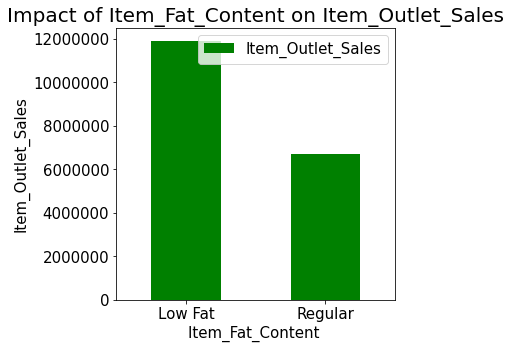

In [57]:
# understanding the fat content on sales outlet
Outlet_Type_pivot = Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)
Outlet_Type_pivot.plot(kind='bar', color='GREEN',figsize=(5,5))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style="plain")
plt.show()

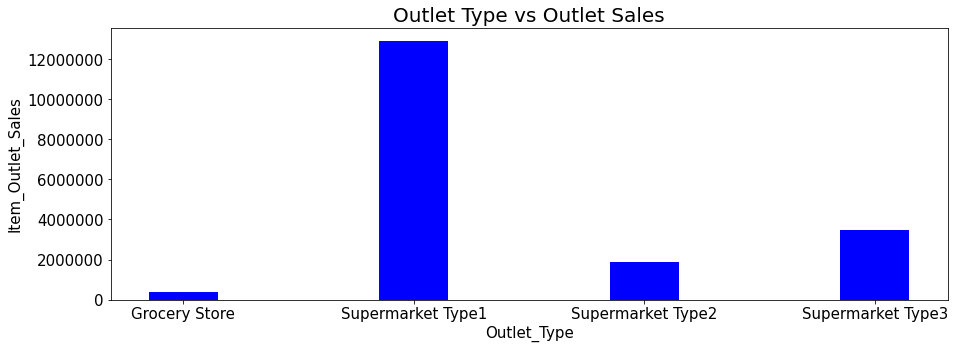

In [64]:
# Impact of Outlet Type on Sales
plt.figure(figsize=(15,5))
type2=Train_data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
store_types=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
plt.bar(store_types,type2, width=0.3,color='BLUE')
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

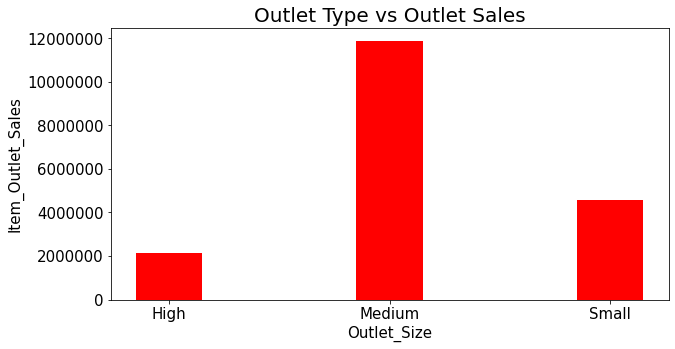

In [59]:
# Impact of Outlet size on Sales
plt.figure(figsize=(10,5))
type3 = Train_data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
size = ['High', 'Medium', 'Small']
plt.bar(size, type3, color='RED',width=0.3)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

### Model Development 

In [60]:
# encoding the labels for training and test data
# Label encoder is used since the data are littlebit ordinal there canbe order can be seen
from sklearn.preprocessing import LabelEncoder

# Label encoder for training data
le=LabelEncoder()

# converting non numeric data to numeric data
Train_data['Item_Identifier']=le.fit_transform(Train_data['Item_Identifier'])
Train_data['Item_Type']=le.fit_transform(Train_data['Item_Type'])
Train_data['Item_Fat_Content']=le.fit_transform(Train_data['Item_Fat_Content'])
Train_data['Outlet_Identifier']=le.fit_transform(Train_data['Outlet_Identifier'])
Train_data['Outlet_Size']=le.fit_transform(Train_data['Outlet_Size'])
Train_data['Outlet_Location_Type']=le.fit_transform(Train_data['Outlet_Location_Type'])
Train_data['Outlet_Type']=le.fit_transform(Train_data['Outlet_Type'])
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [61]:
# Label encoder for test data
le1=LabelEncoder()

# converting non numeric data to numeric data
Test_data['Item_Identifier']=le1.fit_transform(Test_data['Item_Identifier'])
Test_data['Item_Type']=le.fit_transform(Test_data['Item_Type'])
Test_data['Item_Fat_Content']=le1.fit_transform(Test_data['Item_Fat_Content'])
Test_data['Outlet_Identifier']=le1.fit_transform(Test_data['Outlet_Identifier'])
Test_data['Outlet_Size']=le1.fit_transform(Test_data['Outlet_Size'])
Test_data['Outlet_Location_Type']=le1.fit_transform(Test_data['Outlet_Location_Type'])
Test_data['Outlet_Type']=le1.fit_transform(Test_data['Outlet_Type'])
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,9.30,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,5.92,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,17.50,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,19.20,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,8.93,1,0.118599,4,234.2300,5,1985,1,2,3


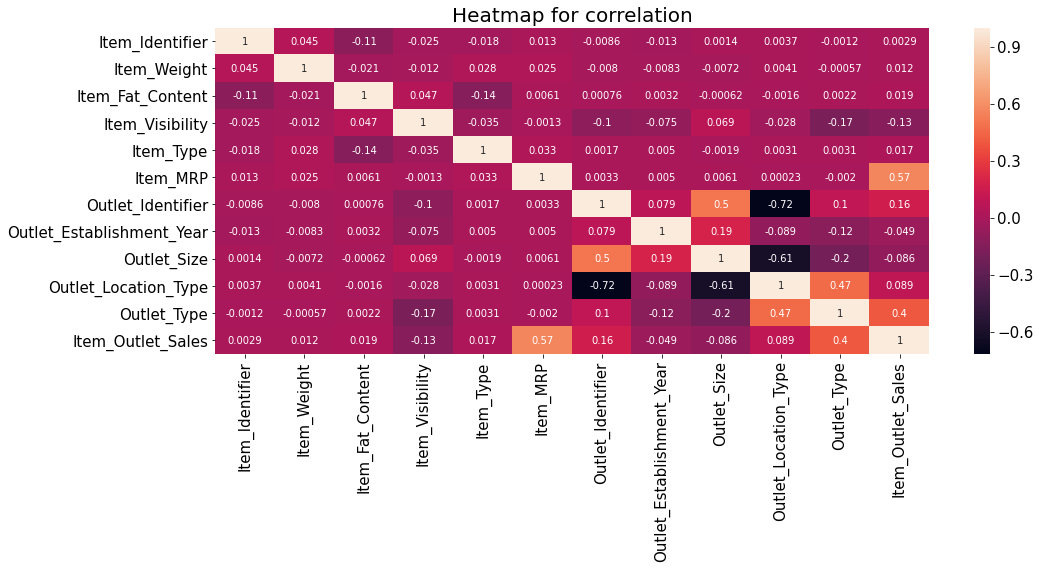

In [65]:
# creating a heatmap for correlation for training data
plt.figure(figsize=(16,6))
ax=sns.heatmap(Train_data.corr(),annot=True)
plt.title('Heatmap for correlation')
figure = ax.get_figure()
figure.savefig('Heatmap for correlation')

#### Spliting the Training dataset to train and test data to train a model

In [66]:
# splitiing the Train_data as y data with dependent variable and x data with independent variables
y_data = Train_data['Item_Outlet_Sales']
x_data= Train_data.drop(columns=['Item_Outlet_Sales'])

In [67]:
# spliting the training data with 40% test size
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(x_data,y_data,test_size=0.4)

print('X_train has ',X_train.shape,'Rows and Columns.')
print('X_test has ',X_test.shape,'Rows and Columns.')
print('Y_train has ',Y_train.shape,'Rows and Columns.')
print('Y_test has ',Y_test.shape,'Rows and Columns.')

X_train has  (5113, 11) Rows and Columns.
X_test has  (3410, 11) Rows and Columns.
Y_train has  (5113,) Rows and Columns.
Y_test has  (3410,) Rows and Columns.


The models that are going to be developed are

    1. Linear regression
    2. Decision Tree regressor
    3. Random forest regressor
    4. Gradient boosting regressor

In [68]:
# Developing a linear model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# Calculating Mean squared error
from sklearn.metrics import mean_squared_error
lr_predict=lr.predict(X_test)
mse=mean_squared_error(Y_test,lr_predict)
lr_score=np.sqrt(mse)
lr_score

1169.3386409327754

In [70]:
# Creating ridge regression
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(X_train,Y_train)
r_predict=r.predict(X_test)
mse=mean_squared_error(Y_test,r_predict)
r_score=np.sqrt(mse)
r_score

1169.3383744943465

In [71]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
dtr_predict=dtr.predict(X_test)
mse=mean_squared_error(Y_test,dtr_predict)
dtr_score=np.sqrt(mse)
dtr_score

1491.3167577510121

In [72]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
rfr_predict=rfr.predict(X_test)
mse=mean_squared_error(Y_test,rfr_predict)
rfr_score=np.sqrt(mse)
rfr_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1155.5691631028742

In [73]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
gbr_predict=gbr.predict(X_test)
mse=mean_squared_error(Y_test,gbr_predict)
gbr_score=np.sqrt(mse)
gbr_score

1068.4268839948159

In [74]:
# Developing a data frame for the model scores.
# Devloping a data frame
Models=['Linear Regression', 'Ridge Regression', 'Decision Tree Regressor', 
        'Random forest regressor', 'Gradient boosting regressor']

In [75]:
go=pd.DataFrame({'RSME':[lr_score,r_score,dtr_score,rfr_score,gbr_score]},index=Models)
go['RSME'].sort_values()

Gradient boosting regressor    1068.426884
Random forest regressor        1155.569163
Ridge Regression               1169.338374
Linear Regression              1169.338641
Decision Tree Regressor        1491.316758
Name: RSME, dtype: float64

This shows that Gradient boosting regressor have lowest RSME.

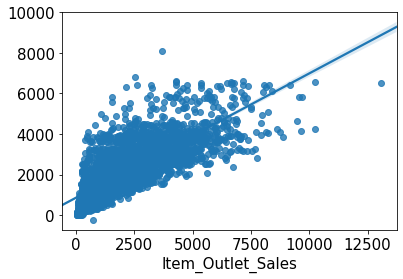

In [76]:
# creating the regression plot
sns.regplot(Y_test,gbr_predict)

In [77]:
# predict for test data using Gradient boosting regressor
Yhat=gbr.predict(Test_data)
Yhat

array([1642.13224721, 1412.56565106,  733.18824842, ..., 1923.40625714,
       3745.94105468, 1193.08672356])

In [78]:
# loading the submision data
Submission=pd.read_csv('sample_submission_Bigmart.csv')
Submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [79]:
# concat the dataset for submission
df=pd.DataFrame({'Item_Outlet_Sales Predicted':Yhat})
corr_ans=pd.concat([Submission,df],axis=1)
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales,Item_Outlet_Sales Predicted
0,FDW58,OUT049,1000,1642.132247
1,FDW14,OUT017,1000,1412.565651
2,NCN55,OUT010,1000,733.188248
3,FDQ58,OUT017,1000,2548.254479
4,FDY38,OUT027,1000,6363.598639
...,...,...,...,...
5676,FDB58,OUT046,1000,2266.347727
5677,FDD47,OUT018,1000,2426.870809
5678,NCO17,OUT045,1000,1923.406257
5679,FDJ26,OUT017,1000,3745.941055


In [84]:
corr_ans.dtypes

Item_Identifier                 object
Outlet_Identifier               object
Item_Outlet_Sales                int64
Item_Outlet_Sales Predicted    float64
dtype: object